In [2]:
import pandas as pd
import numpy as np
import src.edhec_risk_kit as erk

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
ind = erk.read_ind_returns(data_loc='./data')

In [4]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [25]:
er = erk.annualized_returns(ind["1996":"2000"])
cov = ind["1996":"2000"].cov()

In [10]:
l = ["Food", "Steel"]

In [11]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [12]:
cov.loc[l,l]

,Food,Steel
Food,0.002609,0.00007
Steel,0.000070,0.00723


In [15]:
rf = 0.1
w = erk.MSR(cov=cov.loc[l,l],er=er[l],risk_free_return=rf)
w

array([0.75040363, 0.24959637])

In [19]:
erk.portfolio_return(np.array([0.5,0.5]),er[l])

0.11630361697262592

In [23]:
np.round(erk.GMV(cov)*100, 5)

array([ 3.13254,  0.     ,  0.83738,  0.23818,  0.     ,  7.82313,
        0.     ,  6.48765,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , 48.29241,  3.15167,  0.     , 10.13213,  0.     ,
        0.     ,  0.     ,  8.38589, 11.51902,  0.     ,  0.     ])

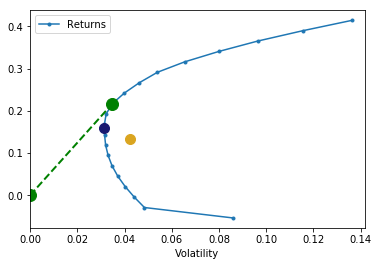

In [29]:
erk.plot_ef(n_points=20,
            er=er,
            cov=cov,
            risk_free_return=0.0,
            show_cml=True,
            show_ew=True,
            show_gmv=True,
            style='.-')